### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/univariate">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/univariate.git'

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, sys
from scipy import stats
import matplotlib.pyplot as plt

sys.path.append('/content/univariate')
from Univariate import *

## Example

**<font size=5 color='blue'> UnivariateOutliers </font>**

---

`UnivariateOutliers` determines univariate outliers within one variable at a time. Any identified outlier, is capped to the lower/upper value.

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [2]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names

Randomly replace numerical value with `np.nan`.

In [3]:
np.random.seed(0)
NaN = np.random.random(X.shape)<0.1
X = pd.DataFrame(np.where(NaN, np.nan, X), columns=cols).iloc[:,:5]

Add non-numeric and all-nan fields

In [4]:
X['only_str'], X['all_nan'] = 'only_str', np.nan

Univariate outlier detection methods
- "**pct**"   : Percentile
- "**sigma**" : Z-score
- "**iqr**"   : Interquartile range
- "**grubb**" : Grubbs' test (Grubbs 1969 and Stefansky 1972)
- "**gesd**"  : Generalized Extreme Studentized Deviate
- "**mad**"   : Median Absolute Deviation
- "**mae**"   : Mean Absolute Error

In [5]:
model = UnivariateOutliers().fit(X)

/Users/600201/Desktop/Python Projects/== Univariate ==/Revision_01/Univariate.py:722: UserWarning: Data variables must be numerical. List of non-numerical variables: ['only_str']
  warn(message)
/Users/600201/Desktop/Python Projects/== Univariate ==/Revision_01/Univariate.py:733: UserWarning: Data variables must contain numerical values more than 10 records. List of invalid variables: ['all_nan']
  warn(message)


Excluded variables

In [6]:
model.exclude

{'non_numeric': ['only_str'], 'min_numeric': ['all_nan']}

In [7]:
model.info

,variable,lower,upper,n_lower,n_upper,n_outlier,n_notnan,p_outlier
0,mean area,-90.415776,1669.944390,0,12,12,506,0.023715
1,mean radius,5.575586,24.727001,0,5,5,510,0.009804
2,mean perimeter,35.200213,161.368201,0,5,5,505,0.009901
3,mean texture,8.188421,32.457089,0,3,3,513,0.005848
4,mean smoothness,0.054784,0.140480,1,3,4,498,0.008032


In [8]:
model.capped_X.head(5)

,mean area,mean radius,mean perimeter,mean texture,mean smoothness
0,1001.0,17.99,122.80,10.38,0.11840
1,1326.0,20.57,132.90,17.77,NaN
2,1203.0,19.69,130.00,21.25,0.10960
3,386.1,11.42,77.58,20.38,0.14048
4,1297.0,20.29,135.10,14.34,0.10030


**<font size=5 color='blue'> chi2_test </font>**

---

A chi-square goodness of fit test determines whether sample data fits a particular population.

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [9]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

$H_{0}$ : data follows a normal distribution.

$H_{A}$ : data does not follow a normal distribution.

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [10]:
chi2_test(x, dist="norm")

Chi2_Test(chisq=0.4773224553586323, df=9, pvalue=0.9999750744566653, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

If shape-related parameters are known e.g. $\mu$ or $\sigma$ or true population, we can freeze them for the instance of the distribution.

In [11]:
chi2_test(x, dist=stats.norm(loc=2, scale=2))

Chi2_Test(chisq=0.5705377388241217, df=9, pvalue=0.9999464408294994, dist='norm', params={'args': (), 'kwds': {'loc': 2, 'scale': 2}})

If $\alpha$ is 5% (0.05), we can not reject the null hypothesis (0.99 > 0.05). Or we can determine the critical value as follows:

In [12]:
print('Degrees of freedom = {:,.0f}'.format(9))
print('Critical Value = {:,.4f}'.format(stats.chi2.ppf(0.95, 9)))

Degrees of freedom = 9
Critical Value = 16.9190


We cannot reject the null hypotheis since $\chi^{2}$ is 0.477, which is less than $\chi^{2}_{\alpha=0.05, df=7}$ = 16.919

**<font size=5 color='blue'> qq_plot </font>**

---

Standard quantile-quantile (Q-Q) plot (Wilk and Gnanadesikan, 1968) is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other [wikipedia](https://en.wikipedia.org/wiki/Q–Q_plot)

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [13]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

See whether `x` follows normal or uniform distribution.

In [14]:
qq_plot(x, dist="norm")

QQ_plot(r=0.9998759256965545, statistic=0.6020687774273007, rmse=0.06358873382864735, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

In [15]:
qq_plot(x, dist="uniform")   

QQ_plot(r=0.9717582798499491, statistic=0.6020687774273007, rmse=1.239596599563976, dist='uniform', params=(-3.5451855128533003, 10.93763361798046))

In this case, "**norm**" returns higher value of `r` along with smaller value of `mse`, thus we could say that a random variable `x`, has a distribution similar to a normal random distribution, $N(\mu=2,\sigma=2)$. However, visualizing a Q-Q plot is highly recommended as indicators can sometimes be inadequate to conclude "**goodness of fit**" of both distributions.

**<font size=5 color='blue'> MatchDist </font>**

---

Matching distribution with data by using following methods:
- Chi-Square Test
- Kolmogorov-Smirnov Test
- Q-Q plot

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [16]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names
X = pd.DataFrame(X, columns=cols)

In [17]:
model = MatchDist().fit(X)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1727: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:7901: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/600201/Desktop/Python Projects/== Univariate ==/Revision_01/Univariate.py:398: RuntimeWarning: divide by zero encountered in true_divide
  chisq = ((observe-expect)**2/expect).sum()
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:1

Summary of results

In [18]:
model.info.sample(5)

,variable,chi2_chisq,chi2_pvalue,chi2_dist,ks_statistic,ks_pvalue,ks_dist,qq_r,qq_rmse,qq_dist
13,compactness error,2.869744,0.999992,lognorm,0.029363,0.699117,lognorm,0.999000,0.000978,lognorm
23,worst symmetry,4.957541,0.999465,lognorm,0.047914,0.141981,tukeylambda,0.994510,0.007066,lognorm
11,mean texture,2.105868,0.999999,lognorm,0.016919,0.995991,lognorm,0.999208,0.188160,gamma
21,worst perimeter,8.267237,0.983774,gamma,0.059028,0.036411,gamma,0.996534,3.069619,gamma
17,texture error,2.509939,0.999998,lognorm,0.018530,0.987804,lognorm,0.999242,0.024009,chi2


To visualize the distribution, use `plotting` function.

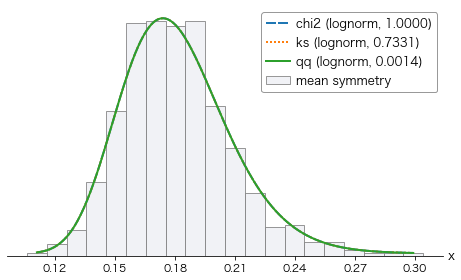

In [27]:
ax = model.plotting(np.random.choice(cols))

**<font size=5 color='blue'> Compare2samp </font>**

---

Determine goodness of fit between two sets of data by using following methods:

- Chi-Square Test
- Kolmogorov-Smirnov Test (**scipy.stats.ks_2samp**)
- Population Stability Index (PSI)

**Note**: This function runs on scikit-learn 0.24.2

In [28]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
random_X = X.sample(200).copy()

In [29]:
model = Compare2samp(frac=0.02, max_category=1000).fit(X, random_X)

Summary of results

In [30]:
model.info.head()

,chi2_chisq,chi2_df,chi2_pvalue,chi2_bins,ks_stat,ks_pvalue,psi,dtype
variable,,,,,,,,
pclass,0.286793,2,0.866410,3,0.026635,0.999376,0.002857,int32
age,5.490865,7,0.600286,8,0.078426,0.223035,0.057509,float32
sibsp,0.317912,2,0.853034,3,0.024328,0.999885,0.003284,int32
parch,0.168203,2,0.919338,3,0.009660,1.000000,0.001697,int32
fare,0.272329,2,0.872699,3,0.045084,0.854358,0.024068,float32


To visualize, use `plotting`.

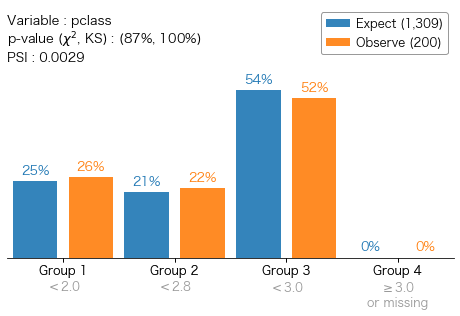

In [31]:
var = np.random.choice(list(model.result.keys()))
ax = model.plotting(var, max_display=1)

**<font size=5 color='blue'> Descriptive </font>**

---

Descriptive statistics.

We use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [32]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names
X = pd.DataFrame(X, columns=cols)
model = Descriptive().fit(X)

Summary of results
- **Descriptive.num_info** (numerical)
- **Descriptive.str_info** (non-numerical)

In [33]:
model.num_info.iloc[:,:5].head()

variable,area error,compactness error,concave points error,concavity error,fractal dimension error
unique,528.000000,541.000000,507.000000,533.000000,545.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000
mean,40.337079,0.025478,0.011796,0.031894,0.003795
std,45.451013,0.017892,0.006165,0.030160,0.002644
fisher skew,5.432816,1.897202,1.440867,5.096981,3.913617


To visualize the distribution, use `plotting` function powered by `descriptive_plot`.

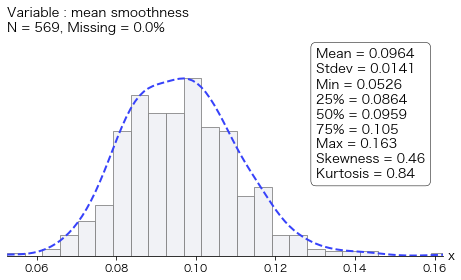

In [34]:
ax = model.plotting(np.random.choice(X.columns))

Alternatively, we can use `descriptive_plot` to plot the distribution.

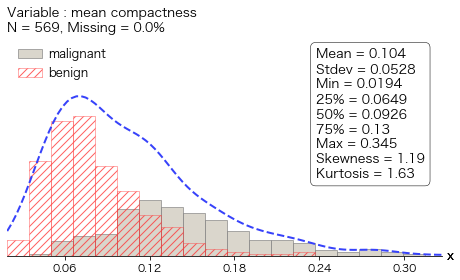

In [36]:
var = np.random.choice(X.columns)
bins = np.histogram(X[var], bins="fd")[1]

kwds = {"m" : dict(hist_kwds={"facecolor": "none", "edgecolor": "none"}), 
        "0" : dict(plot_kwds={"color"    : "none"}, 
                   hist_kwds={"facecolor": "#d1ccc0", "alpha" : 0.8}, 
                   show_title=False, show_stats=False, whis=None),
        "1" : dict(plot_kwds={"color"    : "none"}, 
                   hist_kwds={"facecolor": "none", "hatch": "///", 
                              "alpha" : 0.8, "linewidth": 0.5, 
                              "edgecolor": "#ff3838"},
                   show_title=False, show_stats=False, whis=None)}

ax = descriptive_plot(X, var, bins, **kwds["m"])
ymin, ymax = ax.get_ylim()
ax = descriptive_plot(X.loc[y==0], var, bins, **{**kwds["0"],**{"ax":ax}})
ax = descriptive_plot(X.loc[y==1], var, bins, **{**kwds["1"],**{"ax":ax}})
patches = np.array([p for p in ax.get_children() if p.__class__.__name__ 
                    == "Rectangle"])[len(bins)::len(bins)]
ax.set_ylim(ymin, ymax/0.9)
ax.legend(patches, load_breast_cancer().target_names, edgecolor="none", 
          facecolor="none", borderaxespad=0.5, columnspacing=0.3,
          handletextpad=0.5, loc="upper left", prop=dict(size=12))

plt.show()